In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2 años en adelante hay que aplicar bootstraping (HAY QUE PASAR A TASA 0 CUPÓN)
# Hacer matriz de diferencias (Delta X = X_i - X_i-1)
# Graficar 1M VS TPM (BUSCAR EXCEL EN EL BANCO CENTRAL)

In [197]:
df = pd.read_excel("swap_camara_df.xlsx", sheet_name=0)
df = df.drop(df.index[0])
df = df.dropna().reset_index(drop=True)
df = df.rename(columns={"Unnamed: 0": "Fecha"})
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce", dayfirst=True)
df

,Fecha,CHSWPA ICCH Curncy,CHSWPB ICCH Curncy,CHSWPC ICCH Curncy,CHSWPF ICCH Curncy,CHSWPI ICCH Curncy,CHSWP1 ICCH Curncy,CHSWP1F ICCH Curncy,CHSWP2 ICCH Curncy,CHSWP3 ICCH Curncy,CHSWP4 ICCH Curncy,CHSWP5 ICCH Curncy,CHSWP7 ICCH Curncy,CHSWP10 ICCH Curncy,CHSWP12 ICCH Curncy,CHSWP15 ICCH Curncy,CHSWP20 ICCH Curncy,CHSWP25 ICCH Curncy
0,2021-07-21,0.63,0.735,0.89,1.205,1.46,1.71,2.075,2.34,2.685,2.985,3.255,3.72,4.05,4.24,4.365,4.55,4.65
1,2021-07-22,0.72,0.82,0.915,1.21,1.465,1.72,2.08,2.33,2.67,2.95,3.215,3.675,4.015,4.2,4.32,4.49,4.59
2,2021-07-23,0.745,0.82,0.915,1.21,1.46,1.715,2.07,2.315,2.65,2.93,3.195,3.65,4.005,4.185,4.32,4.485,4.585
3,2021-07-26,0.745,0.83,0.935,1.245,1.495,1.745,2.115,2.355,2.69,2.98,3.245,3.7,4.05,4.215,4.335,4.5,4.6
4,2021-07-27,0.755,0.85,0.98,1.31,1.575,1.82,2.205,2.475,2.83,3.13,3.39,3.855,4.22,4.39,4.5,4.675,4.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,2025-09-09,4.74,4.725,4.695,4.625,4.575,4.55,4.535,4.44,4.535,4.63,4.73,4.925,5.175,5.29,5.4,5.45,5.45
1038,2025-09-10,4.76,4.76,4.745,4.695,4.645,4.62,4.605,4.5,4.58,4.655,4.745,4.935,5.185,5.3,5.41,5.46,5.465
1039,2025-09-11,4.76,4.755,4.75,4.685,4.635,4.6,4.585,4.475,4.555,4.63,4.715,4.9,5.145,5.255,5.365,5.42,5.425
1040,2025-09-12,4.765,4.765,4.78,4.71,4.68,4.65,4.63,4.52,4.595,4.67,4.765,4.95,5.185,5.295,5.405,5.46,5.46


In [198]:
Tenor = {"1M"  : "CHSWPA ICCH Curncy" , "2M" : "CHSWPB ICCH Curncy" , 
         "3M"  : "CHSWPC ICCH Curncy" , "6M" : "CHSWPF ICCH Curncy" , 
         "9M"  : "CHSWPI ICCH Curncy" , "1Y" : "CHSWP1 ICCH Curncy" ,
         "1Y6M": "CHSWP1F ICCH Curncy", "2Y" : "CHSWP2 ICCH Curncy" ,
         "3Y"  : "CHSWP3 ICCH Curncy" , "4Y" : "CHSWP4 ICCH Curncy" ,
         "5Y"  : "CHSWP5 ICCH Curncy" , "7Y" : "CHSWP7 ICCH Curncy" , 
         "10Y" : "CHSWP10 ICCH Curncy", "12Y": "CHSWP12 ICCH Curncy", 
         "15Y" : "CHSWP15 ICCH Curncy", "20Y": "CHSWP20 ICCH Curncy", 
         "25Y" : "CHSWP25 ICCH Curncy"}

In [199]:
# c1 = Tenor["1M"]
# c2 = Tenor["1Y"]

# df[[c1, c2]].plot(figsize=(8,4), grid=True)

In [200]:
#c1 = Tenor["1M"]  # x
#c2 = Tenor["2M"]  # y

#fig, ax = plt.subplots()
#ax.plot(df[c1], df[c2])  # o ax.scatter(df[c1], df[c2])
#ax.set_xlabel(c1)
#ax.set_ylabel(c2)
#ax.grid(True)
#plt.show()

<Axes: >

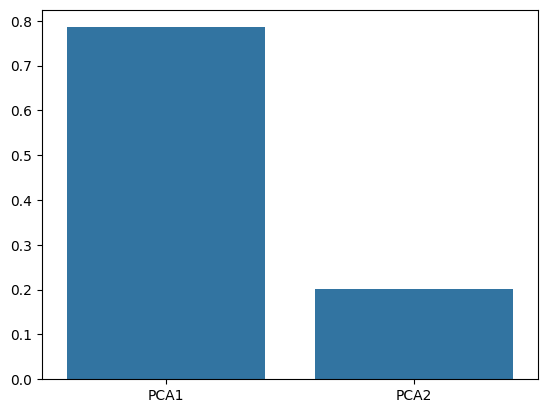

In [201]:
ss = StandardScaler()
X = df.copy()
X_cols = df.columns.tolist()[1:]
X[X_cols] = ss.fit_transform(df[X_cols])
n = 2
pca_raw = PCA(n_components = n, random_state = 42)
scores = pca_raw.fit_transform(X[X_cols])

df_2 = pd.DataFrame({"PCA1": scores[:,0], "PCA2": scores[:,1], "Fecha": df["Fecha"]})
sns.barplot(x=[f"PCA{i+1}" for i in range(n)], y=pca_raw.explained_variance_ratio_)

In [204]:
print(pca_raw.explained_variance_ratio_)

[0.78568522 0.20247024]


In [55]:
#c1 = Tenor["1M"]  # x
#c2 = Tenor["1Y"]  # y

#fig, ax = plt.subplots()
#ax.plot(df[c1], df[c2])  # o ax.scatter(df[c1], df[c2])
#ax.set_xlabel(c1)
#ax.set_ylabel(c2)
#ax.grid(True)
#plt.show()

In [56]:
# Matrices útiles
eigvec = pca_raw.components_.T                    # (n_features x n_components) = e_{jk}
eigval = pca_raw.explained_variance_              # lambda_k
expl_ratio = pca_raw.explained_variance_ratio_    # % varianza por PC

print(eigval,expl_ratio)

[13.36947933  3.44530056  0.14253059] [0.78568522 0.20247024 0.00837611]


In [57]:
contrib_var_to_pc = (eigvec**2)
contrib_var_to_pc = contrib_var_to_pc / contrib_var_to_pc.sum(axis=0)

contrib_var_to_pc_df = pd.DataFrame(contrib_var_to_pc,columns=[f'PC{k+1}' for k in range(eigvec.shape[1])])
contrib_var_to_pc_df["Tenor"] = ['CHSWPA ICCH Curncy',
 'CHSWPB ICCH Curncy',
 'CHSWPC ICCH Curncy',
 'CHSWPF ICCH Curncy',
 'CHSWPI ICCH Curncy',
 'CHSWP1 ICCH Curncy',
 'CHSWP1F ICCH Curncy',
 'CHSWP2 ICCH Curncy',
 'CHSWP3 ICCH Curncy',
 'CHSWP4 ICCH Curncy',
 'CHSWP5 ICCH Curncy',
 'CHSWP7 ICCH Curncy',
 'CHSWP10 ICCH Curncy',
 'CHSWP12 ICCH Curncy',
 'CHSWP15 ICCH Curncy',
 'CHSWP20 ICCH Curncy',
 'CHSWP25 ICCH Curncy']
contrib_var_to_pc_df["Tenor"]

0      CHSWPA ICCH Curncy
1      CHSWPB ICCH Curncy
2      CHSWPC ICCH Curncy
3      CHSWPF ICCH Curncy
4      CHSWPI ICCH Curncy
5      CHSWP1 ICCH Curncy
6     CHSWP1F ICCH Curncy
7      CHSWP2 ICCH Curncy
8      CHSWP3 ICCH Curncy
9      CHSWP4 ICCH Curncy
10     CHSWP5 ICCH Curncy
11     CHSWP7 ICCH Curncy
12    CHSWP10 ICCH Curncy
13    CHSWP12 ICCH Curncy
14    CHSWP15 ICCH Curncy
15    CHSWP20 ICCH Curncy
16    CHSWP25 ICCH Curncy
Name: Tenor, dtype: object

In [58]:
contrib_var_to_pc_df

,PC1,PC2,PC3,Tenor
0,0.040903,0.121847,0.229740,CHSWPA ICCH Curncy
1,0.045040,0.110398,0.126246,CHSWPB ICCH Curncy
2,0.048298,0.100378,0.063686,CHSWPC ICCH Curncy
3,0.055907,0.073037,0.000315,CHSWPF ICCH Curncy
4,0.061683,0.049558,0.019759,CHSWPI ICCH Curncy
5,0.065883,0.031708,0.058983,CHSWP1 ICCH Curncy
6,0.070391,0.012837,0.098122,CHSWP1F ICCH Curncy
7,0.072437,0.004986,0.097865,CHSWP2 ICCH Curncy
8,0.074020,0.000018,0.065933,CHSWP3 ICCH Curncy
9,0.073446,0.002949,0.039704,CHSWP4 ICCH Curncy


In [59]:
#cols = df.columns[1:]          # o una lista específica
#ax = df[cols].plot(figsize=(10,5), linewidth=1)
#ax.set_xlabel("Índice")
#ax.set_ylabel("Valor")
#ax.legend(loc="upper left", bbox_to_anchor=(1,1))  # leyenda afuera
#plt.tight_layout()
#plt.show()

In [60]:
#cols = df.columns[1:]  # tus 17 series
# Eje X: tiempo (numérico). Si el índice es datetime, pásalo a días desde el inicio.
#if np.issubdtype(df.index.dtype, np.datetime64):
#    t = (df.index - df.index.min()) / np.timedelta64(1, 'D')
#    t = t.astype(float)
#else:
#    t = np.arange(len(df), dtype=float)

#fig = plt.figure(figsize=(12,6))
#ax = fig.add_subplot(111, projection='3d')

#for i, c in enumerate(cols):
 #   y = np.full_like(t, i, dtype=float)        # offset por serie (profundidad)
  #  z = df[c].values
  #  ax.plot(t, y, z, lw=1, alpha=0.9)
    # Opcional: “cortina” hasta z=0 para efecto relieve
    # ax.plot(np.r_[t, t[::-1]], np.r_[y, y[::-1]], np.r_[z, np.zeros_like(z)], alpha=0.15)

#ax.set_xlabel("Tiempo")
#ax.set_ylabel("Serie")
#ax.set_zlabel("Valor")

# ticks con nombres (si son muchos, muestra algunos)
#step = max(1, len(cols)//8)
#ax.set_yticks(np.arange(0, len(cols), step))
#ax.set_yticklabels(cols[::step], fontsize=8)

#plt.tight_layout()
#plt.show()


/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_15954/3927509271.py:16: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_15954/3927509271.py:33: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



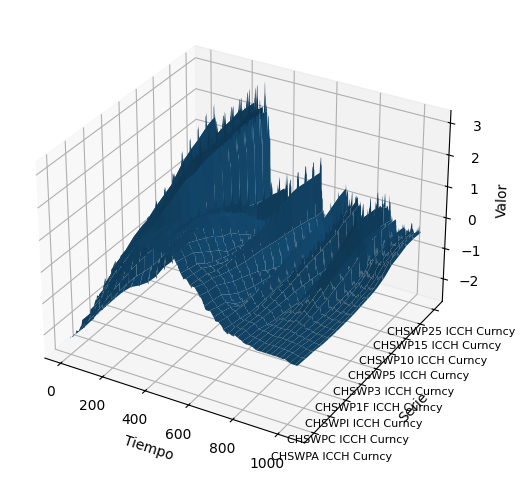

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cols = X.columns[1:]
M = X[cols].copy()

# Si el índice es datetime → a días
if np.issubdtype(M.index.dtype, np.datetime64):
    x = (M.index - M.index.min()) / np.timedelta64(1, 'D')
    x = x.astype(float)
else:
    x = np.arange(len(M), dtype=float)

# Si hay NaN, interpola por columna
M = M.interpolate().fillna(method='bfill').fillna(method='ffill')

Xg, Yg = np.meshgrid(x, np.arange(len(cols)), indexing='ij')
Z = M.to_numpy()  # shape: (n_tiempos, n_series)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xg, Yg, Z, linewidth=0, antialiased=True)

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")

step = max(1, len(cols)//8)
ax.set_yticks(np.arange(0, len(cols), step))
ax.set_yticklabels(cols[::step], fontsize=8)

plt.tight_layout()
plt.show()


In [41]:
"""
import plotly.express as px


cols = df.columns[1:]
tmp = df[cols].copy()
tmp['x'] = df.index

# derretir a formato largo
long = tmp.melt(id_vars='x', var_name='serie', value_name='valor')

# x numérico si es datetime
if np.issubdtype(long['x'].dtype, np.datetime64):
    long['x'] = (pd.to_datetime(long['x']) - long['x'].min()).dt.total_seconds()/86400.0

fig = px.line_3d(long, x='x', y='serie', z='valor', color='serie',
                 labels={'x':'Tiempo (días)','serie':'Serie','valor':'Valor'},
                 title='Series en 3D')
fig.update_traces(line=dict(width=2))
fig.show()
"""

"\nimport plotly.express as px\n\n\ncols = df.columns[1:]\ntmp = df[cols].copy()\ntmp['x'] = df.index\n\n# derretir a formato largo\nlong = tmp.melt(id_vars='x', var_name='serie', value_name='valor')\n\n# x numérico si es datetime\nif np.issubdtype(long['x'].dtype, np.datetime64):\n    long['x'] = (pd.to_datetime(long['x']) - long['x'].min()).dt.total_seconds()/86400.0\n\nfig = px.line_3d(long, x='x', y='serie', z='valor', color='serie',\n                 labels={'x':'Tiempo (días)','serie':'Serie','valor':'Valor'},\n                 title='Series en 3D')\nfig.update_traces(line=dict(width=2))\nfig.show()\n"

In [42]:
"""

cols = df.columns[1:]

# eje X (tiempo) en escala numérica
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (df.index - df.index.min()) / np.timedelta64(1, 'D')
    t = t.astype(float)
else:
    t = np.arange(len(df), dtype=float)

# normaliza t a [0,1] para que el gradiente sea comparable entre series
t01 = (t - t.min()) / (t.max() - t.min() + 1e-12)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

for i, c in enumerate(cols):
    y = np.full_like(t01, i, dtype=float)
    z = df[c].to_numpy()
    # puntos muy juntos → efecto de línea con gradiente
    sc = ax.scatter(t, y, z, c=t01, s=4, cmap='viridis')  # cambia 'viridis' si quieres

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")

step = max(1, len(cols)//8)
ax.set_yticks(np.arange(0, len(cols), step))
ax.set_yticklabels(cols[::step], fontsize=8)

plt.tight_layout()
plt.show()
"""

'\n\ncols = df.columns[1:]\n\n# eje X (tiempo) en escala numérica\nif np.issubdtype(df.index.dtype, np.datetime64):\n    t = (df.index - df.index.min()) / np.timedelta64(1, \'D\')\n    t = t.astype(float)\nelse:\n    t = np.arange(len(df), dtype=float)\n\n# normaliza t a [0,1] para que el gradiente sea comparable entre series\nt01 = (t - t.min()) / (t.max() - t.min() + 1e-12)\n\nfig = plt.figure(figsize=(12,6))\nax = fig.add_subplot(111, projection=\'3d\')\n\nfor i, c in enumerate(cols):\n    y = np.full_like(t01, i, dtype=float)\n    z = df[c].to_numpy()\n    # puntos muy juntos → efecto de línea con gradiente\n    sc = ax.scatter(t, y, z, c=t01, s=4, cmap=\'viridis\')  # cambia \'viridis\' si quieres\n\nax.set_xlabel("Tiempo")\nax.set_ylabel("Serie")\nax.set_zlabel("Valor")\n\nstep = max(1, len(cols)//8)\nax.set_yticks(np.arange(0, len(cols), step))\nax.set_yticklabels(cols[::step], fontsize=8)\n\nplt.tight_layout()\nplt.show()\n'

In [43]:
"""
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cols = df.columns[1:]
M = df[cols].copy().interpolate().fillna(method='bfill').fillna(method='ffill')

# X (tiempo) numérico
if np.issubdtype(M.index.dtype, np.datetime64):
    x = (M.index - M.index.min()) / np.timedelta64(1, 'D')
    x = x.astype(float)
else:
    x = np.arange(len(M), dtype=float)

Xg, Yg = np.meshgrid(x, np.arange(len(cols)), indexing='ij')
Z = M.to_numpy()

# Gradiente por tiempo: normaliza x y crea facecolors
t01 = (x - x.min()) / (x.max() - x.min() + 1e-12)
norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = cm.get_cmap('viridis')
# expandimos t01 a la rejilla (mismo color por fila de tiempo)
C = cmap(norm(np.repeat(t01[:, None], len(cols), axis=1)))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(Xg, Yg, Z, facecolors=C, linewidth=0, antialiased=True, shade=False)

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")

step = max(1, len(cols)//8)
ax.set_yticks(np.arange(0, len(cols), step))
ax.set_yticklabels(cols[::step], fontsize=8)

plt.tight_layout()
plt.show()
"""

'\nimport matplotlib.cm as cm\nimport matplotlib.colors as mcolors\n\ncols = df.columns[1:]\nM = df[cols].copy().interpolate().fillna(method=\'bfill\').fillna(method=\'ffill\')\n\n# X (tiempo) numérico\nif np.issubdtype(M.index.dtype, np.datetime64):\n    x = (M.index - M.index.min()) / np.timedelta64(1, \'D\')\n    x = x.astype(float)\nelse:\n    x = np.arange(len(M), dtype=float)\n\nXg, Yg = np.meshgrid(x, np.arange(len(cols)), indexing=\'ij\')\nZ = M.to_numpy()\n\n# Gradiente por tiempo: normaliza x y crea facecolors\nt01 = (x - x.min()) / (x.max() - x.min() + 1e-12)\nnorm = mcolors.Normalize(vmin=0, vmax=1)\ncmap = cm.get_cmap(\'viridis\')\n# expandimos t01 a la rejilla (mismo color por fila de tiempo)\nC = cmap(norm(np.repeat(t01[:, None], len(cols), axis=1)))\n\nfig = plt.figure(figsize=(12,6))\nax = fig.add_subplot(111, projection=\'3d\')\n\nsurf = ax.plot_surface(Xg, Yg, Z, facecolors=C, linewidth=0, antialiased=True, shade=False)\n\nax.set_xlabel("Tiempo")\nax.set_ylabel("Seri

In [44]:
"""
import plotly.graph_objects as go

cols = df.columns[1:]

# tiempo numérico
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (pd.to_datetime(df.index) - pd.to_datetime(df.index).min()).total_seconds() / 86400.0
else:
    t = np.arange(len(df), dtype=float)

# normaliza para que el gradiente sea consistente
t01 = (t - t.min()) / (t.max() - t.min() + 1e-12)

fig = go.Figure()

for i, c in enumerate(cols):
    y = np.full_like(t01, i, dtype=float)
    z = df[c].to_numpy()

    fig.add_trace(go.Scatter3d(
        x=t, y=y, z=z,
        mode='lines',
        name=str(c),
        line=dict(color=t01, colorscale='Viridis', width=4),  # gradiente
        hovertemplate=f"Serie: {c}<br>t=%{{x:.2f}}<br>valor=%{{z:.4f}}<extra></extra>"
    ))

fig.update_layout(
    width=1000, height=600,
    scene=dict(
        xaxis_title='Tiempo (días)',
        yaxis_title='Serie',
        zaxis_title='Valor',
        yaxis=dict(
            tickmode='array',
            tickvals=list(range(len(cols)))[::max(1, len(cols)//8)],
            ticktext=cols[::max(1, len(cols)//8)]
        )
    ),
    legend=dict(itemsizing='trace', orientation='h', y=-0.1)
)

fig.show()
"""

'\nimport plotly.graph_objects as go\n\ncols = df.columns[1:]\n\n# tiempo numérico\nif np.issubdtype(df.index.dtype, np.datetime64):\n    t = (pd.to_datetime(df.index) - pd.to_datetime(df.index).min()).total_seconds() / 86400.0\nelse:\n    t = np.arange(len(df), dtype=float)\n\n# normaliza para que el gradiente sea consistente\nt01 = (t - t.min()) / (t.max() - t.min() + 1e-12)\n\nfig = go.Figure()\n\nfor i, c in enumerate(cols):\n    y = np.full_like(t01, i, dtype=float)\n    z = df[c].to_numpy()\n\n    fig.add_trace(go.Scatter3d(\n        x=t, y=y, z=z,\n        mode=\'lines\',\n        name=str(c),\n        line=dict(color=t01, colorscale=\'Viridis\', width=4),  # gradiente\n        hovertemplate=f"Serie: {c}<br>t=%{{x:.2f}}<br>valor=%{{z:.4f}}<extra></extra>"\n    ))\n\nfig.update_layout(\n    width=1000, height=600,\n    scene=dict(\n        xaxis_title=\'Tiempo (días)\',\n        yaxis_title=\'Serie\',\n        zaxis_title=\'Valor\',\n        yaxis=dict(\n            tickmode=\'ar

In [45]:
"""
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cols = df.columns[1:]
N = len(cols)

# tiempo numérico
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (df.index - df.index.min()) / np.timedelta64(1, 'D')
    t = t.astype(float)
else:
    t = np.arange(len(df), dtype=float)

# gradiente por serie
norm = mcolors.Normalize(vmin=0, vmax=N-1)
cmap = cm.get_cmap('viridis')  # prueba también 'plasma','magma','cividis','turbo'

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

for i, c in enumerate(cols):
    y = np.full_like(t, i, dtype=float)
    z = df[c].to_numpy()
    color = cmap(norm(i))
    ax.plot(t, y, z, lw=1.8, color=color, alpha=0.95)

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")
step = max(1, N//8)
ax.set_yticks(np.arange(0, N, step))
ax.set_yticklabels(cols[::step], fontsize=8)
plt.tight_layout(); plt.show()
"""

'\nimport matplotlib.cm as cm\nimport matplotlib.colors as mcolors\n\ncols = df.columns[1:]\nN = len(cols)\n\n# tiempo numérico\nif np.issubdtype(df.index.dtype, np.datetime64):\n    t = (df.index - df.index.min()) / np.timedelta64(1, \'D\')\n    t = t.astype(float)\nelse:\n    t = np.arange(len(df), dtype=float)\n\n# gradiente por serie\nnorm = mcolors.Normalize(vmin=0, vmax=N-1)\ncmap = cm.get_cmap(\'viridis\')  # prueba también \'plasma\',\'magma\',\'cividis\',\'turbo\'\n\nfig = plt.figure(figsize=(12,6))\nax = fig.add_subplot(111, projection=\'3d\')\n\nfor i, c in enumerate(cols):\n    y = np.full_like(t, i, dtype=float)\n    z = df[c].to_numpy()\n    color = cmap(norm(i))\n    ax.plot(t, y, z, lw=1.8, color=color, alpha=0.95)\n\nax.set_xlabel("Tiempo")\nax.set_ylabel("Serie")\nax.set_zlabel("Valor")\nstep = max(1, N//8)\nax.set_yticks(np.arange(0, N, step))\nax.set_yticklabels(cols[::step], fontsize=8)\nplt.tight_layout(); plt.show()\n'

In [46]:
"""
import plotly.graph_objects as go
import plotly.express as px

cols = df.columns[1:]
N = len(cols)

# tiempo numérico
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (pd.to_datetime(df.index) - pd.to_datetime(df.index).min()).dt.total_seconds()/86400.0
else:
    t = np.arange(len(df), dtype=float)

# paleta continua y muestreo N colores equiespaciados
colors = px.colors.sample_colorscale('Viridis', [i/(N-1 if N>1 else 1) for i in range(N)])

fig = go.Figure()
for i, c in enumerate(cols):
    y = np.full(len(t), i, dtype=float)
    z = df[c].to_numpy()
    fig.add_trace(go.Scatter3d(
        x=t, y=y, z=z, mode='lines', name=str(c),
        line=dict(color=colors[i], width=4), opacity=0.95
    ))

fig.update_layout(
    width=1000, height=600,
    scene=dict(
        xaxis_title='Tiempo (días)',
        yaxis_title='Serie',
        zaxis_title='Valor',
        yaxis=dict(tickmode='array',
                   tickvals=list(range(N))[::max(1, N//8)],
                   ticktext=cols[::max(1, N//8)])
    ),
    legend=dict(orientation='h', y=-0.1)
)
fig.show()
"""

"\nimport plotly.graph_objects as go\nimport plotly.express as px\n\ncols = df.columns[1:]\nN = len(cols)\n\n# tiempo numérico\nif np.issubdtype(df.index.dtype, np.datetime64):\n    t = (pd.to_datetime(df.index) - pd.to_datetime(df.index).min()).dt.total_seconds()/86400.0\nelse:\n    t = np.arange(len(df), dtype=float)\n\n# paleta continua y muestreo N colores equiespaciados\ncolors = px.colors.sample_colorscale('Viridis', [i/(N-1 if N>1 else 1) for i in range(N)])\n\nfig = go.Figure()\nfor i, c in enumerate(cols):\n    y = np.full(len(t), i, dtype=float)\n    z = df[c].to_numpy()\n    fig.add_trace(go.Scatter3d(\n        x=t, y=y, z=z, mode='lines', name=str(c),\n        line=dict(color=colors[i], width=4), opacity=0.95\n    ))\n\nfig.update_layout(\n    width=1000, height=600,\n    scene=dict(\n        xaxis_title='Tiempo (días)',\n        yaxis_title='Serie',\n        zaxis_title='Valor',\n        yaxis=dict(tickmode='array',\n                   tickvals=list(range(N))[::max(1, N//8

In [79]:
TPM21 = pd.read_excel("tpm_2021.xls",engine="xlrd")
TPM22 = pd.read_excel("tpm_2022.xls",engine="xlrd")
TPM23 = pd.read_excel("tpm_2023.xls",engine="xlrd")
TPM24 = pd.read_excel("tpm_2024.xls",engine="xlrd")
TPM25 = pd.read_excel("tpm_2025.xls",engine="xlrd")

TPM_raw = pd.concat([TPM21, TPM22, TPM23, TPM24, TPM25], ignore_index=True)
TPM_raw = TPM_raw.dropna().reset_index(drop=True)
TPM_raw = TPM_raw.rename(columns={"Dia": "Fecha","Valor": "TPM"})
TPM_raw

,Fecha,TPM
0,2021-01-04,0.50
1,2021-01-05,0.50
2,2021-01-06,0.50
3,2021-01-07,0.50
4,2021-01-08,0.50
...,...,...
1174,2025-09-22,4.75
1175,2025-09-23,4.75
1176,2025-09-24,4.75
1177,2025-09-25,4.75


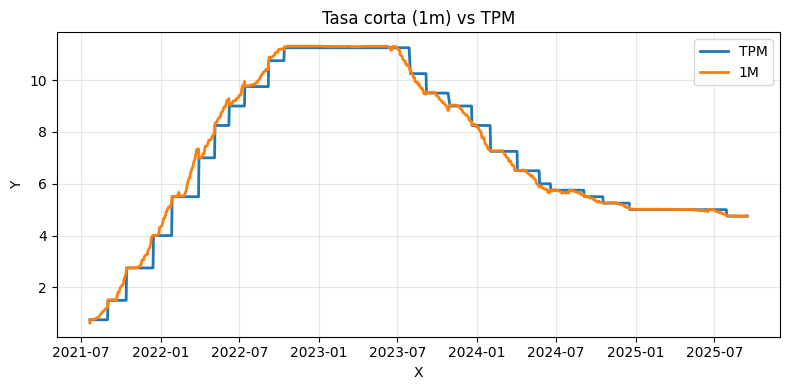

In [111]:
setA = set(TPM_raw["Fecha"])
setB = set(df["Fecha"])
x = sorted(setA & setB)


plt.figure(figsize=(8,4))
plt.plot(x, TPM_raw[TPM_raw["Fecha"].isin(x)]["TPM"], label="TPM", linewidth=2)
plt.plot(x, df[df["Fecha"].isin(x)][Tenor["1M"]], label="1M", linewidth=2)
plt.xlabel("X"); plt.ylabel("Y"); plt.title("Tasa corta (1m) vs TPM")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [112]:
DF = df.rename(columns={v: k for k, v in Tenor.items()})
import re

def tenor_a_meses(s: str) -> int:
    """
    Convierte un tenor como '1M', '2M', '1Y', '1Y6M', '12Y', ' 1Y 6M ' a meses (int).
    - Y = años, M = meses
    """
    if s is None:
        raise ValueError("Tenor vacío")
    st = str(s).strip().upper().replace(" ", "")
    # Coincide opcionalmente años y/o meses (en ese orden típico)
    m = re.fullmatch(r'(?:(\d+)Y)?(?:(\d+)M)?', st)
    if not m:
        raise ValueError(f"Tenor no reconocido: {s!r}")
    years = int(m.group(1) or 0)
    months = int(m.group(2) or 0)
    return years * 12 + months
DF = DF.rename(columns={v: tenor_a_meses(v) for v in Tenor.keys()})
DF = DF.drop(columns=["Fecha"])
DF

,1,2,3,6,9,12,18,24,36,48,60,84,120,144,180,240,300
0,0.63,0.735,0.89,1.205,1.46,1.71,2.075,2.34,2.685,2.985,3.255,3.72,4.05,4.24,4.365,4.55,4.65
1,0.72,0.82,0.915,1.21,1.465,1.72,2.08,2.33,2.67,2.95,3.215,3.675,4.015,4.2,4.32,4.49,4.59
2,0.745,0.82,0.915,1.21,1.46,1.715,2.07,2.315,2.65,2.93,3.195,3.65,4.005,4.185,4.32,4.485,4.585
3,0.745,0.83,0.935,1.245,1.495,1.745,2.115,2.355,2.69,2.98,3.245,3.7,4.05,4.215,4.335,4.5,4.6
4,0.755,0.85,0.98,1.31,1.575,1.82,2.205,2.475,2.83,3.13,3.39,3.855,4.22,4.39,4.5,4.675,4.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,4.74,4.725,4.695,4.625,4.575,4.55,4.535,4.44,4.535,4.63,4.73,4.925,5.175,5.29,5.4,5.45,5.45
1038,4.76,4.76,4.745,4.695,4.645,4.62,4.605,4.5,4.58,4.655,4.745,4.935,5.185,5.3,5.41,5.46,5.465
1039,4.76,4.755,4.75,4.685,4.635,4.6,4.585,4.475,4.555,4.63,4.715,4.9,5.145,5.255,5.365,5.42,5.425
1040,4.765,4.765,4.78,4.71,4.68,4.65,4.63,4.52,4.595,4.67,4.765,4.95,5.185,5.295,5.405,5.46,5.46


In [119]:
# columnas objetivo
months = [1, 2, 3, 6, 9, 12] + list(range(18, 301, 6))
cols = months

# 1) DataFrame vacío con esos nombres de columna
DF_nuevo = pd.DataFrame(columns=cols)
# DF_nuevo["Fecha"] = pd.to_datetime(DF_nuevo["Fecha"])  # dtype datetime

# --- variantes útiles ---

# 2) Si quieres n filas (inicializadas en NaN) y Fecha vacía (NaT):
n = 0  # pon el número de filas deseado
DF_nuevo = pd.DataFrame(index=range(n), columns=cols)
# DF_nuevo["Fecha"] = pd.to_datetime(DF_nuevo["Fecha"])

# 3) Si ya tienes una lista/Serie de fechas para la columna Fecha:
# fechas = pd.date_range("2021-01-01", periods=10, freq="D")
# DF_nuevo = pd.DataFrame({"Fecha": pd.to_datetime(fechas)})
# for c in months: DF_nuevo[c] = pd.NA

for col in DF_nuevo.columns:
    if col in DF.columns:
        DF_nuevo[col] = DF[col]
DF_nuevo = DF_nuevo.fillna(-1)
DF_nuevo


/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_15954/27559125.py:24: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,1,2,3,6,9,12,18,24,30,36,...,246,252,258,264,270,276,282,288,294,300
0,0.630,0.735,0.890,1.205,1.460,1.710,2.075,2.340,-1,2.685,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4.650
1,0.720,0.820,0.915,1.210,1.465,1.720,2.080,2.330,-1,2.670,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4.590
2,0.745,0.820,0.915,1.210,1.460,1.715,2.070,2.315,-1,2.650,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4.585
3,0.745,0.830,0.935,1.245,1.495,1.745,2.115,2.355,-1,2.690,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4.600
4,0.755,0.850,0.980,1.310,1.575,1.820,2.205,2.475,-1,2.830,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,4.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,4.740,4.725,4.695,4.625,4.575,4.550,4.535,4.440,-1,4.535,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5.450
1038,4.760,4.760,4.745,4.695,4.645,4.620,4.605,4.500,-1,4.580,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5.465
1039,4.760,4.755,4.750,4.685,4.635,4.600,4.585,4.475,-1,4.555,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5.425
1040,4.765,4.765,4.780,4.710,4.680,4.650,4.630,4.520,-1,4.595,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,5.460


In [122]:
x_1 = 0
x_2 = 0

for i in range(24, 301, 6):
    if DF_nuevo[i][0] != -1:
        x_1 = i
    else:
        for j in range(i, 301, 6):
            if DF_nuevo[j][0] != -1:
                x_2 = j
                break
        DF_nuevo[i] = DF_nuevo[x_1] + (i-x_1)*(DF_nuevo[x_2]-DF_nuevo[x_1])/(x_2-x_1)
            
DF_nuevo

,1,2,3,6,9,12,18,24,30,36,...,246,252,258,264,270,276,282,288,294,300
0,0.630,0.735,0.890,1.205,1.460,1.710,2.075,2.340,2.5125,2.685,...,4.5600,4.570,4.5800,4.590,4.6000,4.610,4.6200,4.630,4.6400,4.650
1,0.720,0.820,0.915,1.210,1.465,1.720,2.080,2.330,2.5000,2.670,...,4.5000,4.510,4.5200,4.530,4.5400,4.550,4.5600,4.570,4.5800,4.590
2,0.745,0.820,0.915,1.210,1.460,1.715,2.070,2.315,2.4825,2.650,...,4.4950,4.505,4.5150,4.525,4.5350,4.545,4.5550,4.565,4.5750,4.585
3,0.745,0.830,0.935,1.245,1.495,1.745,2.115,2.355,2.5225,2.690,...,4.5100,4.520,4.5300,4.540,4.5500,4.560,4.5700,4.580,4.5900,4.600
4,0.755,0.850,0.980,1.310,1.575,1.820,2.205,2.475,2.6525,2.830,...,4.6850,4.695,4.7050,4.715,4.7250,4.735,4.7450,4.755,4.7650,4.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,4.740,4.725,4.695,4.625,4.575,4.550,4.535,4.440,4.4875,4.535,...,5.4500,5.450,5.4500,5.450,5.4500,5.450,5.4500,5.450,5.4500,5.450
1038,4.760,4.760,4.745,4.695,4.645,4.620,4.605,4.500,4.5400,4.580,...,5.4605,5.461,5.4615,5.462,5.4625,5.463,5.4635,5.464,5.4645,5.465
1039,4.760,4.755,4.750,4.685,4.635,4.600,4.585,4.475,4.5150,4.555,...,5.4205,5.421,5.4215,5.422,5.4225,5.423,5.4235,5.424,5.4245,5.425
1040,4.765,4.765,4.780,4.710,4.680,4.650,4.630,4.520,4.5575,4.595,...,5.4600,5.460,5.4600,5.460,5.4600,5.460,5.4600,5.460,5.4600,5.460


In [125]:
"""
DFACTOR = DF_nuevo.copy()

for j in [1, 2, 3, 6, 9, 12, 18]:
    DFACTOR[j] = 1/(1+DFACTOR[j]*(j/1200))
    
i = [k for k in range(6, 301, 6)]
for j in range(24, 301, 6):
    r = DFACTOR[j]/100
    DFACTOR[j] = (1 - r*0.5*DFACTOR[[k for k in range(6, j, 6)]].sum(axis=1, min_count=1))/(1 + DFACTOR[j] * 0.5)

DFACTOR
"""

'\nDFACTOR = DF_nuevo.copy()\n\nfor j in [1, 2, 3, 6, 9, 12, 18]:\n    DFACTOR[j] = 1/(1+DFACTOR[j]*(j/1200))\n    \ni = [k for k in range(6, 301, 6)]\nfor j in range(24, 301, 6):\n    r = DFACTOR[j]/100\n    DFACTOR[j] = (1 - r*0.5*DFACTOR[[k for k in range(6, j, 6)]].sum(axis=1, min_count=1))/(1 + DFACTOR[j] * 0.5)\n\nDFACTOR\n'

In [144]:
RATES   = DF_nuevo.copy()          
DFACTOR = DF_nuevo.copy() 

# Tramo corto: 1M,2M,3M,6M,9M,12M,18M
short_months = [1, 2, 3, 6, 9, 12, 18]
for m in short_months:
    r = RATES[m] / 100.0          # tasa en decimal
    delta = m/12.0                # si prefieres ACT/360 usa días/360
    DFACTOR[m] = 1.0 / (1.0 + r*delta)

# --- 2) Bootstrap semestral (> 18M) con alpha=0.5 ---
for m in range(24, 301, 6):       # 24,30,36,...,300
    K = RATES[m] / 100.0          # usa la tasa PAR del tenor m desde el DataFrame de tasas
    prev = list(range(6, m, 6))   # 6,12,...,m-6  (OJO: excluye m)
    S = 0.5 * DFACTOR[prev].sum(axis=1, min_count=1)  # suma POR FILA de los DF previos
    DFACTOR[m] = (1.0 - K*S) / (1.0 + K*0.5)

DFACTOR

,1,2,3,6,9,12,18,24,30,36,...,246,252,258,264,270,276,282,288,294,300
0,0.999475,0.998776,0.997780,0.994011,0.989169,0.983187,0.969815,0.954354,0.939190,0.922629,...,0.378814,0.369019,0.359408,0.349978,0.340725,0.331647,0.322742,0.314007,0.305439,0.297036
1,0.999400,0.998635,0.997718,0.993986,0.989132,0.983091,0.969744,0.954549,0.939489,0.923052,...,0.384408,0.374593,0.364958,0.355501,0.346219,0.337110,0.328171,0.319399,0.310793,0.302349
2,0.999380,0.998635,0.997718,0.993986,0.989169,0.983139,0.969885,0.954836,0.939902,0.923609,...,0.384659,0.374847,0.365214,0.355759,0.346479,0.337371,0.328433,0.319663,0.311057,0.302614
3,0.999380,0.998619,0.997668,0.993814,0.988912,0.982849,0.969251,0.954078,0.938969,0.922508,...,0.383989,0.374167,0.364526,0.355063,0.345776,0.336663,0.327719,0.318945,0.310335,0.301889
4,0.999371,0.998585,0.997556,0.993493,0.988325,0.982125,0.967984,0.951794,0.935925,0.918638,...,0.369586,0.359795,0.350193,0.340778,0.331547,0.322497,0.313625,0.304929,0.296406,0.288052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.996066,0.992187,0.988399,0.977398,0.966826,0.956480,0.936308,0.915948,0.894968,0.874037,...,0.323377,0.314799,0.306448,0.298319,0.290405,0.282702,0.275203,0.267902,0.260796,0.253877
1038,0.996049,0.992129,0.988277,0.977063,0.966335,0.955840,0.935388,0.914879,0.893832,0.872907,...,0.322728,0.314090,0.305680,0.297492,0.289520,0.281758,0.274202,0.266846,0.259683,0.252710
1039,0.996049,0.992137,0.988264,0.977111,0.966405,0.956023,0.935651,0.915330,0.894383,0.873552,...,0.325335,0.316689,0.308269,0.300071,0.292087,0.284312,0.276742,0.269370,0.262191,0.255201
1040,0.996045,0.992121,0.988191,0.976992,0.966090,0.955566,0.935060,0.914524,0.893455,0.872532,...,0.322792,0.314214,0.305864,0.297735,0.289823,0.282121,0.274624,0.267326,0.260222,0.253307


In [186]:
TASAS_0_CUPON = (1/(DFACTOR) - 1)*360/180

for j in [1, 2, 3, 6, 9, 12, 18]:
    TASAS_0_CUPON[j] = (1/(DFACTOR[j]) - 1)*360/(30*j)*100

for j in range(24, 301, 6):
    TASAS_0_CUPON[j] = (1/(DFACTOR[j]) - 1)*360/(30*j)*100
    
TASAS_0_CUPON

,1,2,3,6,9,12,18,24,30,36,...,246,252,258,264,270,276,282,288,294,300
0,0.630,0.735,0.890,1.205,1.460,1.710,2.075,2.391460,2.589869,2.795301,...,7.999123,8.142310,8.290008,8.442392,8.599648,8.761974,8.929580,9.102689,9.281540,9.466385
1,0.720,0.820,0.915,1.210,1.465,1.720,2.080,2.380756,2.576325,2.778761,...,7.811711,7.950298,8.093200,8.240585,8.392628,8.549519,8.711456,8.878652,9.051332,9.229735
2,0.745,0.820,0.915,1.210,1.460,1.715,2.070,2.365007,2.557638,2.756974,...,7.803436,7.941700,8.084270,8.231314,8.383006,8.539534,8.701097,8.867906,9.040185,9.218175
3,0.745,0.830,0.935,1.245,1.495,1.745,2.115,2.406638,2.599933,2.800038,...,7.825560,7.964773,8.108317,8.256360,8.409080,8.566666,8.729320,8.897254,9.070696,9.249887
4,0.755,0.850,0.980,1.310,1.575,1.820,2.205,2.532350,2.738485,2.952266,...,8.320622,8.473160,8.630560,8.793016,8.960733,9.133930,9.312839,9.497707,9.688799,9.886394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,4.740,4.725,4.695,4.625,4.575,4.550,4.535,4.588261,4.694346,4.803867,...,10.206654,10.364909,10.526484,10.691437,10.859828,11.031720,11.207178,11.386270,11.569066,11.755636
1038,4.760,4.760,4.745,4.695,4.645,4.620,4.605,4.652056,4.751137,4.853244,...,10.236999,10.399064,10.564648,10.733819,10.906650,11.083214,11.263591,11.447859,11.636102,11.828406
1039,4.760,4.755,4.750,4.685,4.635,4.600,4.585,4.625083,4.723574,4.825049,...,10.115882,10.274638,10.436820,10.602493,10.771727,10.944594,11.121168,11.301527,11.485750,11.673920
1040,4.765,4.765,4.780,4.710,4.680,4.650,4.630,4.673275,4.770030,4.869670,...,10.234013,10.393082,10.555492,10.721301,10.890571,11.063364,11.239747,11.419789,11.603558,11.791128


In [194]:
TASAS_0_CUPON_FILTRADAS = TASAS_0_CUPON[DF.columns.tolist()]
TASAS_0_CUPON_FILTRADAS 

,1,2,3,6,9,12,18,24,36,48,60,84,120,144,180,240,300
0,0.630,0.735,0.890,1.205,1.460,1.710,2.075,2.391460,2.795301,3.177638,3.555096,4.314135,5.112941,5.711661,6.403304,7.860283,9.466385
1,0.720,0.820,0.915,1.210,1.465,1.720,2.080,2.380756,2.778761,3.137021,3.506458,4.253084,5.060007,5.641446,6.308484,7.677285,9.229735
2,0.745,0.820,0.915,1.210,1.460,1.715,2.070,2.365007,2.756974,3.114402,3.482806,4.219634,5.047786,5.616674,6.319192,7.669325,9.218175
3,0.745,0.830,0.935,1.245,1.495,1.745,2.115,2.406638,2.800038,3.170938,3.541936,4.285301,5.115655,5.660566,6.331965,7.690522,9.249887
4,0.755,0.850,0.980,1.310,1.575,1.820,2.205,2.532350,2.952266,3.341168,3.713810,4.491260,5.384406,5.971542,6.665941,8.172764,9.886394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,4.740,4.725,4.695,4.625,4.575,4.550,4.535,4.588261,4.803867,5.034427,5.288922,5.852851,6.808229,7.464542,8.465189,10.051662,11.755636
1038,4.760,4.760,4.745,4.695,4.645,4.620,4.605,4.652056,4.853244,5.061272,5.304032,5.862824,6.821400,7.480023,8.484541,10.078387,11.828406
1039,4.760,4.755,4.750,4.685,4.635,4.600,4.585,4.625083,4.825049,5.031707,5.266096,5.812707,6.751518,7.388868,8.376089,9.960488,11.673920
1040,4.765,4.765,4.780,4.710,4.680,4.650,4.630,4.673275,4.869670,5.078623,5.329214,5.882981,6.815283,7.461496,8.464087,10.078228,11.791128


# XCOLS = TASAS_0_CUPON.columns.tolist()

<Axes: >

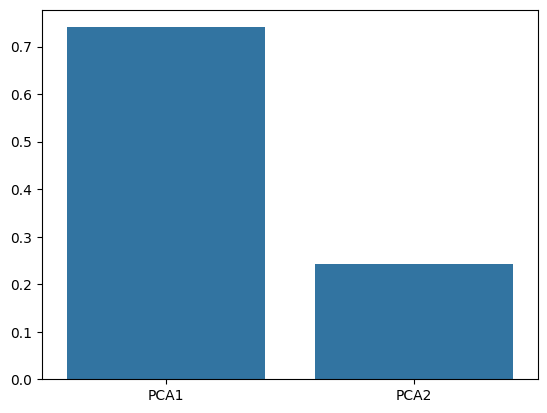

In [205]:
ss = StandardScaler()
X = TASAS_0_CUPON_FILTRADAS .copy()
X_cols = TASAS_0_CUPON_FILTRADAS .columns.tolist()
X[X_cols] = ss.fit_transform(TASAS_0_CUPON_FILTRADAS [X_cols])
n = 2
pca_raw = PCA(n_components = n, random_state = 42)
scores = pca_raw.fit_transform(X[X_cols])

sns.barplot(x=[f"PCA{i+1}" for i in range(n)], y=pca_raw.explained_variance_ratio_)

In [206]:
pca_raw.explained_variance_ratio_

array([0.74060088, 0.24153838])

In [140]:
DFACTOR

,1,2,3,6,9,12,18,24,30,36,...,246,252,258,264,270,276,282,288,294,300
0,0.999475,0.998776,0.997780,0.994011,0.989169,0.983187,0.969815,0.954354,0.939190,0.922629,...,0.378814,0.369019,0.359408,0.349978,0.340725,0.331647,0.322742,0.314007,0.305439,0.297036
1,0.999400,0.998635,0.997718,0.993986,0.989132,0.983091,0.969744,0.954549,0.939489,0.923052,...,0.384408,0.374593,0.364958,0.355501,0.346219,0.337110,0.328171,0.319399,0.310793,0.302349
2,0.999380,0.998635,0.997718,0.993986,0.989169,0.983139,0.969885,0.954836,0.939902,0.923609,...,0.384659,0.374847,0.365214,0.355759,0.346479,0.337371,0.328433,0.319663,0.311057,0.302614
3,0.999380,0.998619,0.997668,0.993814,0.988912,0.982849,0.969251,0.954078,0.938969,0.922508,...,0.383989,0.374167,0.364526,0.355063,0.345776,0.336663,0.327719,0.318945,0.310335,0.301889
4,0.999371,0.998585,0.997556,0.993493,0.988325,0.982125,0.967984,0.951794,0.935925,0.918638,...,0.369586,0.359795,0.350193,0.340778,0.331547,0.322497,0.313625,0.304929,0.296406,0.288052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.996066,0.992187,0.988399,0.977398,0.966826,0.956480,0.936308,0.915948,0.894968,0.874037,...,0.323377,0.314799,0.306448,0.298319,0.290405,0.282702,0.275203,0.267902,0.260796,0.253877
1038,0.996049,0.992129,0.988277,0.977063,0.966335,0.955840,0.935388,0.914879,0.893832,0.872907,...,0.322728,0.314090,0.305680,0.297492,0.289520,0.281758,0.274202,0.266846,0.259683,0.252710
1039,0.996049,0.992137,0.988264,0.977111,0.966405,0.956023,0.935651,0.915330,0.894383,0.873552,...,0.325335,0.316689,0.308269,0.300071,0.292087,0.284312,0.276742,0.269370,0.262191,0.255201
1040,0.996045,0.992121,0.988191,0.976992,0.966090,0.955566,0.935060,0.914524,0.893455,0.872532,...,0.322792,0.314214,0.305864,0.297735,0.289823,0.282121,0.274624,0.267326,0.260222,0.253307


In [142]:
(DFACTOR.select_dtypes(include="number") < 0).any().any()

False

In [143]:
(DFACTOR.select_dtypes(include="number") >1).any().any()

False

In [153]:
DIFMATRIX = TASAS_0_CUPON.copy()
DIFMATRIX

,1,2,3,6,9,12,18,24,30,36,...,246,252,258,264,270,276,282,288,294,300
0,0.630,0.735,0.890,1.205,1.460,1.710,2.075,2.391460,2.589869,2.795301,...,7.999123,8.142310,8.290008,8.442392,8.599648,8.761974,8.929580,9.102689,9.281540,9.466385
1,0.720,0.820,0.915,1.210,1.465,1.720,2.080,2.380756,2.576325,2.778761,...,7.811711,7.950298,8.093200,8.240585,8.392628,8.549519,8.711456,8.878652,9.051332,9.229735
2,0.745,0.820,0.915,1.210,1.460,1.715,2.070,2.365007,2.557638,2.756974,...,7.803436,7.941700,8.084270,8.231314,8.383006,8.539534,8.701097,8.867906,9.040185,9.218175
3,0.745,0.830,0.935,1.245,1.495,1.745,2.115,2.406638,2.599933,2.800038,...,7.825560,7.964773,8.108317,8.256360,8.409080,8.566666,8.729320,8.897254,9.070696,9.249887
4,0.755,0.850,0.980,1.310,1.575,1.820,2.205,2.532350,2.738485,2.952266,...,8.320622,8.473160,8.630560,8.793016,8.960733,9.133930,9.312839,9.497707,9.688799,9.886394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,4.740,4.725,4.695,4.625,4.575,4.550,4.535,4.588261,4.694346,4.803867,...,10.206654,10.364909,10.526484,10.691437,10.859828,11.031720,11.207178,11.386270,11.569066,11.755636
1038,4.760,4.760,4.745,4.695,4.645,4.620,4.605,4.652056,4.751137,4.853244,...,10.236999,10.399064,10.564648,10.733819,10.906650,11.083214,11.263591,11.447859,11.636102,11.828406
1039,4.760,4.755,4.750,4.685,4.635,4.600,4.585,4.625083,4.723574,4.825049,...,10.115882,10.274638,10.436820,10.602493,10.771727,10.944594,11.121168,11.301527,11.485750,11.673920
1040,4.765,4.765,4.780,4.710,4.680,4.650,4.630,4.673275,4.770030,4.869670,...,10.234013,10.393082,10.555492,10.721301,10.890571,11.063364,11.239747,11.419789,11.603558,11.791128


In [178]:
columnas = sorted(DIFMATRIX.columns.tolist())

for j in range(len(columnas)):
    if j == 0:
        DIFMATRIX[columnas[j]] = TASAS_0_CUPON[columnas[j]]
    else:
        DIFMATRIX[columnas[j]] = TASAS_0_CUPON[columnas[j]] - TASAS_0_CUPON[columnas[j-1]]

DIFMATRIX

,1,2,3,6,9,12,18,24,30,36,...,246,252,258,264,270,276,282,288,294,300
0,0.630,1.050000e-01,0.155,0.315,0.255,0.250,0.365,0.316460,0.198408,0.205432,...,0.138840,0.143187,0.147698,0.152384,0.157256,0.162326,0.167606,0.173109,0.178851,0.184845
1,0.720,1.000000e-01,0.095,0.295,0.255,0.255,0.360,0.300756,0.195569,0.202436,...,0.134427,0.138586,0.142902,0.147385,0.152044,0.156891,0.161937,0.167196,0.172680,0.178404
2,0.745,7.500000e-02,0.095,0.295,0.250,0.255,0.355,0.295007,0.192631,0.199337,...,0.134112,0.138263,0.142571,0.147043,0.151692,0.156528,0.161563,0.166809,0.172280,0.177989
3,0.745,8.500000e-02,0.105,0.310,0.250,0.250,0.370,0.291638,0.193294,0.200105,...,0.135039,0.139213,0.143544,0.148043,0.152720,0.157586,0.162653,0.167934,0.173442,0.179191
4,0.755,9.500000e-02,0.130,0.330,0.265,0.245,0.385,0.327350,0.206136,0.213781,...,0.147858,0.152538,0.157400,0.162456,0.167717,0.173197,0.178909,0.184869,0.191092,0.197595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,4.740,-1.500000e-02,-0.030,-0.070,-0.050,-0.025,-0.015,0.053261,0.106084,0.109521,...,0.154991,0.158255,0.161575,0.164953,0.168391,0.171892,0.175458,0.179092,0.182795,0.186571
1038,4.760,0.000000e+00,-0.015,-0.050,-0.050,-0.025,-0.015,0.047056,0.099081,0.102107,...,0.158612,0.162065,0.165584,0.169171,0.172831,0.176565,0.180376,0.184268,0.188243,0.192304
1039,4.760,-5.000000e-03,-0.005,-0.065,-0.050,-0.035,-0.015,0.040083,0.098491,0.101475,...,0.155394,0.158756,0.162182,0.165673,0.169234,0.172867,0.176574,0.180359,0.184223,0.188170
1040,4.765,1.332268e-13,0.015,-0.070,-0.030,-0.030,-0.020,0.043275,0.096755,0.099640,...,0.155785,0.159069,0.162410,0.165809,0.169269,0.172793,0.176383,0.180041,0.183769,0.187570


<Axes: >

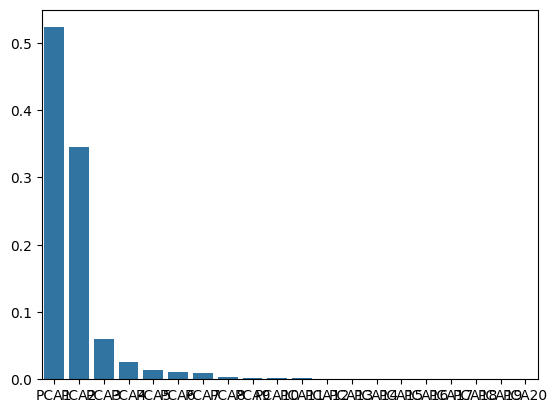

In [180]:
ss = StandardScaler()
X = DIFMATRIX.copy()
X_cols = DIFMATRIX.columns.tolist()
X[X_cols] = ss.fit_transform(DIFMATRIX[X_cols])
n = 20
pca_raw = PCA(n_components = n, random_state = 42)
scores = pca_raw.fit_transform(X[X_cols])

df_2 = pd.DataFrame({"PCA1": scores[:,0], "PCA2": scores[:,1], "Fecha": df["Fecha"]})
sns.barplot(x=[f"PCA{i+1}" for i in range(n)], y=pca_raw.explained_variance_ratio_)